In [9]:
import  lib_Experimentum    as      Exp
from    Alessandria         import  *
from    Models              import  S_2_Generate, S_Dynamical_Form_Factor_2, S_Dynamical_Form_Factor_0, S_0_Generate

import pandas as pd
import  numpy               as      np
from    scipy.io            import  loadmat

from    matplotlib.pyplot   import  plot
import  matplotlib.pyplot   as      plt


import  time


#I/O 
now_path        =   '../BRILLOUIN/TDP43/NO_ARS_12_02/'
spectra_filename    =   'NO_ARS_12_02'
VIPA_filename       =   'NO_ARS_12_02_VIPA_quasisat.tif'
log_file            =   'log_'+spectra_filename
analysis_dir        =   'analysis_new_cut_delta_lorentian/'

#operatives

#esclusi a mano
to_add              =   []

syg_kwargs          =   {'height': 119, 'distance': 31, 'width': 3.}
syg_kwargs_VIPA     =   {'distance':70, 'width': 1}
syg_kwargs_brill    =  {'height': 23, 'distance': 31, 'width': 3.}
VIPA_treshold       =   6
sat_height          =   50000
sat_width           =   13.5
#quanto mi allontano dal VIPA
pre_cut             =   False
cut                 =   False
dist_01 = 37
dist_23 = 34
#markov_fit
recover_markov = False
#percents_markov     =   ('positive', 0.2, 'positive', np.inf, 'positive', 'positive', 0.2, 0.2, 0.2,  np.inf, np.inf)
percents_markov     =   ('positive', 0.2, 'positive', np.inf, 'positive', 'positive', 0.1, 0.011, 0.011,  np.inf, np.inf)
percents_markov_smart     =   ('positive', 0.2, 'positive', np.inf, 'positive', 0.3, 0.05, .05, np.inf, np.inf)

#tot fit
percents_tot        = (0.2, 0.1, 0.5, 'positive', 'positive', 0.15,  0.15, 0.15, np.inf, np.inf)
############


cols_smart  =  ('Co', 'Omega', 'Gamma', 'delta_position',  'delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset')
cols_basic  = ('Co', 'Omega', 'Gamma', 'delta_position', 'delta_width',  'delta_amplitude')
cols        = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_position',  'delta_width', 'delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset')
cols_mark   = ('Co', 'Omega', 'Gamma', 'delta_position', 'delta_width',  'delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset')
cols_real   = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_position', 'delta_width', 'delta_amplitude','shift', 'offset')
cols_gauss  = ( 'A', 'mu', 'sigma')

ATTENZIONE funzione da aggiornare



ATTENZIONE guarda Get_VIPA_mat


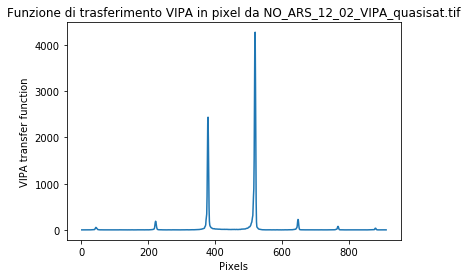

Text(0.5, 1.0, '(1, 75)')

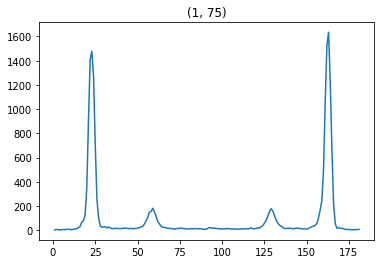

In [19]:
#0) importo dati e inizializzo oggetti
i   =   1
j   =   75
y    =   Import_from_Matlab(spectra_filename, now_path, var_name = 'y3')[i][j]
Data    =   Exp.Spectrum(name = str((i,j)))
Data.Get_Spectrum(y = np.resize(y, np.max(y.shape)), offset = 183., cut = pre_cut, cut_range = (10, 175))
Data.Get_Spectrum_Peaks(**syg_kwargs)
Data.Get_VIPA_tif(VIPA_filename, now_path, fig = 'VIPA_img', save_path = now_path)

plt.figure()
plt.plot(Data.x, Data.y)
plt.title(str((i,j)))

Lo spettro è bono
Lo spettro ha 4 picchi


Text(0.5, 1.0, '(1, 75)')

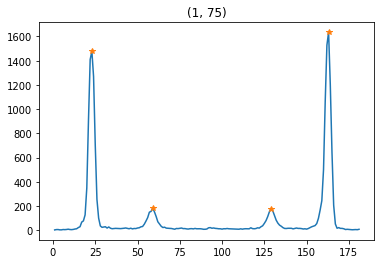

In [20]:
#1) Classificazione e visualizzazione spettro
check = Data.Check_Spectrum_Saturation(saturation_height = sat_height, saturation_width = sat_width)

if      check == 1  : nature    = 'saturo'
elif    (Data.n_peaks == 2) :

    Data.Get_Spectrum_Peaks(**syg_kwargs_brill)
    if (Data.y[Data.peaks['idx'][2]] > Data.y[Data.peaks['idx'][1]]) & (Data.y[Data.peaks['idx'][2]] > Data.y[Data.peaks['idx'][3]]):
        nature    = 'brillouin_highest_dx'
    elif (Data.y[Data.peaks['idx'][1]] > Data.y[Data.peaks['idx'][2]]) & (Data.y[Data.peaks['idx'][1]] > Data.y[Data.peaks['idx'][0]]):
        nature    = 'brillouin_highest_sx'
    else:
        raise ValueError ('Non ho riconosciuto lo spettro\n')

elif (Data.n_peaks == 3) :
    Data.Get_Spectrum_Peaks(**syg_kwargs_brill) 
    nature = 'brillouin_higher'
else:                 nature    = 'bono'
print('Lo spettro è '+nature)
print('Lo spettro ha {} picchi'.format(Data.n_peaks))
plt.figure()
plt.plot(Data.x, Data.y)
plt.plot(Data.x[Data.peaks['idx']], Data.y[Data.peaks['idx']], '*')
plt.title(str((i,j)))

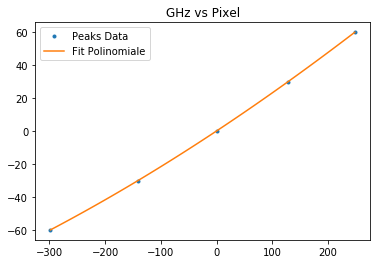

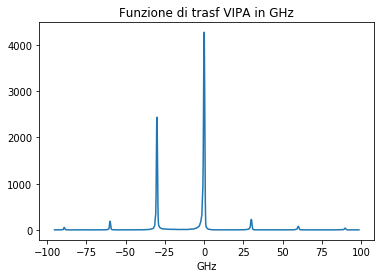

In [21]:
#2) Operazioni di conversione in GHz

Data.How_Many_Peaks_To_VIPA(treshold = VIPA_treshold, **syg_kwargs_VIPA)
Data.Fit_Pixel2GHz(fig = True)
Data.VIPA_Pix2GHz(fig = True)


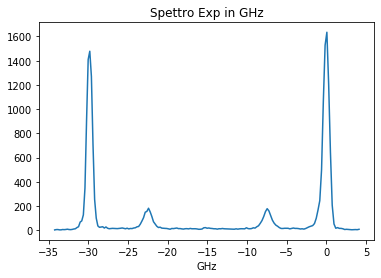

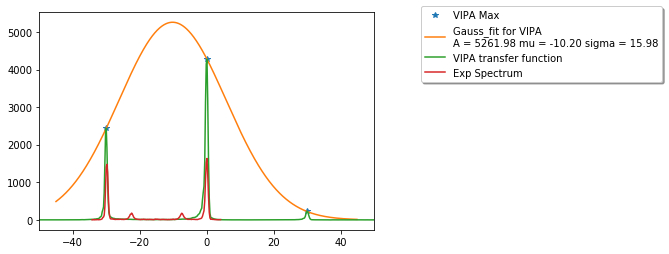

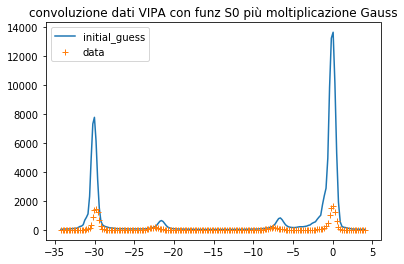

In [22]:
#3) Eseeguo taglio e stima parametri iniziali spettro, verifichepositive
Data.Align_Spectrum()
Data.Spectrum_Pix2GHz(fig = True)
Data.Cut_n_Estimate_Spectrum(estimate = True, cut = cut, mean_dist01 = dist_01, mean_dist23 = dist_23, verbose = True)
Data.Fit_VIPA_Gaussian(fig = True)
p0 = Data.p0[list(cols_mark)].values[0]
#p0 = np.array([ 1.00000000e+00,  7.58814822e+00,  1.00000000e-01,  0.00000000e+00,        1.00000000e-01,  1.00000000,  5.26197998e+03, -1.02027273e+01,     1.59764572e+01,  0.00000000e+00,  0.00000000e+00])
_ = Data.Gauss_Convolve_Markovian_Response(p0, fig = True, compare = True)

In [14]:
Data.p0[list(cols_mark)]

,Co,Omega,Gamma,delta_position,delta_width,delta_amplitude,A,mu,sigma,shift,offset
Values,0.01,7.478667,0.1,0.0,0.1,1,5261.979978,-10.202727,15.976457,0.0,0


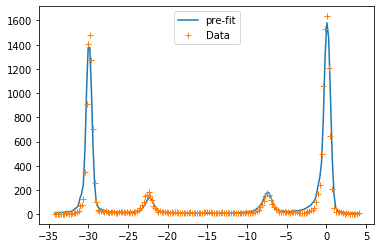

In [40]:
p0 = np.array([ 1.07378474e-01,  7.57148558e+00,  1.49128813e-01,  1.19015861e-01,
        1.448930518e-01,  8.34614271,  4.79747192e+03, -1.00904973e+01,
        1.58007162e+01,  2.11019859e-01, -3.10388495e-01])
plt.figure()
plt.plot(Data.x_freq, Data.Gauss_Convolve_Markovian_Response_Fast(p0), label = 'pre-fit' )
plt.plot(Data.x_freq, Data.y, '+', label = 'Data')
plt.legend()


Cost before fitting = 3438.179722349444
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.7832e+03                                    1.07e+05    
       1              2         1.2874e+03      1.50e+03       1.25e-02       1.14e+04    
       2              3         1.0694e+03      2.18e+02       3.17e+02       2.95e+03    
       3              4         1.0503e+03      1.91e+01       3.73e+02       1.12e+04    
       4              6         1.0436e+03      6.76e+00       1.04e+00       5.59e+03    
       5              7         1.0423e+03      1.27e+00       2.07e+00       1.98e+04    
       6              8         1.0377e+03      4.57e+00       5.19e-01       4.55e+02    
       7              9         1.0376e+03      1.86e-01       1.75e+00       2.06e+03    
       8             10         1.0375e+03      4.03e-02       3.05e+00       6.19e-01    
       9             11         1.0375e+03      5.

,Co,Omega,Gamma,delta_position,delta_width,delta_amplitude,A,mu,sigma,shift,offset
Values,0.116144,7.487083,0.149647,0.110098,0.132275,14.202901,4.803766e+03,-10.090497,15.800716,0.124359,-4.975370
StdErrs,0.014967,0.016505,0.010267,0.000795,0.001426,1.297102,2.357842e+09,1.964660,2.836825,0.016554,0.498922
Initials,0.010000,7.478667,0.100000,0.000000,0.100000,1.000000,5.261980e+03,-10.202727,15.976457,0.000000,0.000000


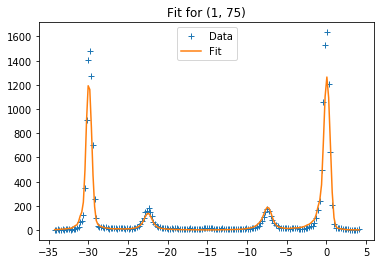

In [38]:
#3) fit markoviano
Data.Get_cost_markov(Data.p0[list(cols_mark)].values[0], columns = cols_mark)
print('Cost before fitting = {}'.format(Data.cost_markov))
Data.Get_Fit_Bounds(percents_markov, cols_mark)
_= Data.Non_Linear_Least_Squares_Markov(cols_mark, p0, bound = (Data.bounds['down'].values, Data.bounds['up'].values), verbose = 2, max_nfev = 200, fig = True, zoom = False)
#_ = Data.Non_Linear_Least_Squares_Markov(bound = (Data.bounds['down'].values, Data.bounds['up'].values),  max_nfev = 500)
Data.Get_cost_markov(Data.Markov_Fit_Params.values[0], columns = cols_mark)
print('Cost after fitting = {}\n'.format(Data.cost_markov))
Data.Markov_Fit_Params

In [18]:
Data.Markov_Fit_Params.values[0]

array([ 1.07378474e-01,  7.57148558e+00,  1.49128813e-01,  1.19015861e-01,
        1.48930518e-01,  2.34614271e-01,  4.79747192e+03, -1.00904973e+01,
        1.58007162e+01,  2.11019859e-01, -3.10388495e-01])

In [12]:
#3) fit markoviano smart
Data.Get_cost_markov(Data.p0[list(cols_smart)].values[0], columns = cols_smart)
print('Cost before fitting = {}'.format(Data.cost_markov))
Data.Get_Fit_Bounds(percents_markov_smart, cols_smart)
_= Data.Non_Linear_Least_Squares_Markov(cols_smart, bound = (Data.bounds['down'].values, Data.bounds['up'].values), verbose = 2, max_nfev = 200, fig = True, zoom = False)
#_ = Data.Non_Linear_Least_Squares_Markov(bound = (Data.bounds['down'].values, Data.bounds['up'].values),  max_nfev = 500)
Data.Get_cost_markov(Data.Markov_Fit_Params.values[0], columns = cols_smart)
print('Cost after fitting = {}\n'.format(Data.cost_markov))
Data.Markov_Fit_Params

Cost before fitting = 16400985277535.047
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.6401e+13                                    3.28e+13    
       1              2         4.1094e+12      1.23e+13       7.27e+02       8.22e+12    


KeyboardInterrupt: 

In [28]:
Data.Markov_Fit_Params.values[0]

array([ 9.94456383e-02,  7.48527792e+00,  9.95875236e-02, -2.00349830e-01,
        5.28149420e-04,  1.18085411e-01,  5.26197998e+03, -1.01008385e+01,
        1.58179541e+01,  1.27908705e-01,  4.08943689e+00])

,Co,Omega,Gamma,delta_position,delta_width,delta_amplitude,A,mu,sigma,shift,offset
Values,0.099446,7.485278,0.099588,-0.200350,0.000528,0.118085,5.261980e+03,-10.100838,15.817954,0.127909,4.089437
StdErrs,0.221615,0.019808,0.011227,0.051744,0.428231,96.177925,1.022083e+10,33.973208,52.485261,0.016786,1.879404


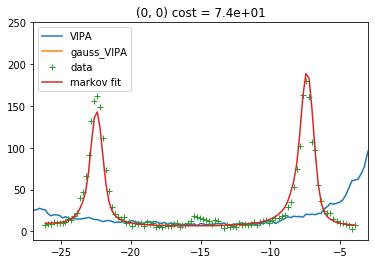

In [29]:
x = np.linspace(4, 26, 1000)
plt.figure()
plt.plot(Data.x_VIPA_freq, Data.y_VIPA, label = 'VIPA')
plt.plot(Data.x_freq, gaussian(Data.x_freq, *Data.Markov_Fit_Params[list(cols_gauss)].values[0]), label = 'gauss_VIPA')
plt.title(str((i,j))+' cost = {:3.2}'.format(Data.cost_markov))
plt.plot(Data.x_freq, Data.y, '+', label = 'data')
plt.plot(Data.x_freq, Data.y_markov_fit, label = 'markov fit')
plt.xlim(-27, -3)
plt.ylim(-10, 250)
plt.legend()
J                =    Data.res_lsq.jac
cov              =    np.linalg.inv(J.T.dot(J))
Delta_Parameters =    np.sqrt(np.diagonal(cov))
df = pd.DataFrame([Data.res_lsq['x'], Delta_Parameters], columns=cols_mark, index= ('Values', 'StdErrs'))
df

In [ ]:
y_markov_fit_tricked = Data.Gauss_Convolve_Markovian_Response_Fast(np.array([ 6.52080428e-01,  7.24912239e+00,  1.32316400e-01,  4.94316064e-02,
        5.72147340e-02,  2.0566009e-01,  6.22012905e+02,  1.08734872e+01,
        1.66735309e+01,  2.07950292e-01, -1.06546696e+00]))

plt.figure()
plt.plot(Data.x_VIPA_freq, Data.y_VIPA, label = 'VIPA')
plt.plot(Data.x_freq, gaussian(Data.x_freq, *np.array([622.0129053 ,  10.87348721,  16.67353093])), label = 'gauss_VIPA')
plt.title(str((i,j))+' cost = {:3.2}'.format(Data.cost_markov))
plt.plot(Data.x_freq, Data.y, '+', label = 'data')
plt.plot(Data.x_freq, y_markov_fit_tricked, label = 'markov fit')
plt.legend()
Data.Markov_Fit_Params.values[0]

In [ ]:
Data.res_lsq['x']


In [ ]:
plt.figure()
plt.title(str((i,j))+' cost = {}'.format(Data.cost_markov))
plt.plot(Data.x_freq, Data.y, label = 'data')
plt.plot(Data.x_freq, Data.y_markov_fit, label = 'fit')
plt.xlim(3, 27)
plt.ylim(-5, 200)
plt.legend()


In [ ]:
#4) fit totale
percents                    =   (0.2, 0.1, 0.1, 'positive', 'positive', 0.15, 0.15, 0.15, np.inf, np.inf)
Data.Initials_Parameters_from_Markov(Data.Markov_Fit_Params.T['Values'].values)
Data.Get_Fit_Bounds(percents, columns = cols_real)
p_gauss = Data.Markov_Fit_Params[list(cols_gauss)].values[0]
Data.Get_p0(Data.p0[list(cols_real)].values[0], cols_real)
Data.Non_Linear_Least_Squares(p_gauss, cols_real, bound = (Data.bounds['down'].values, Data.bounds['up'].values), verbose = 2, fig = True, max_nfev = 50)


In [ ]:
Data.Tot_Fit_Params

In [ ]:
Data.Markov_Fit_Params

In [ ]:
Analyze_Peaks(Data.x, Data.y, 'pix', **syg_kwargs, fig = True, verbose = True)